# Final project - data analysis

## Group 8
## suicides
### Project presenters:

   ##### Shir Levy
   ##### Ahinoam Atias
   ##### Hadar Yadgar

<div> 
<img src = "https://github.com/levyshir7/suicides-rate/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpeg?raw=true" width="800px" >
</div>



---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#F05454'>1. Relevant libraries </b> <b></b> 
---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import requests
from IPython.display import Image


---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#F05454'>2. Data information </b> <b></b> 
---


Our project is about suicides, We wanted to investigate the subject in order to find out the causes of suicides. 
<br> taken from [Kaggle](https://www.kaggle.com/code/aayushi07singh/sucide-rate-analysis/input)

In [2]:
url = "https://raw.githubusercontent.com/levyshir7/suicides-rate/main/sucide%20rate.csv"
suicide = pd.read_csv(url)
(suicide.shape)

(27820, 12)

Our data consists of 12 columns and 27,820 rows

In [3]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gpy',
       'gdp_per_capita ', 'generation'],
      dtype='object')

In [4]:
suicide

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year             gpy  \
0                   6.71     Albania1987           NaN   2,156,624,900   
1                   5.19     Albania1987           NaN   2,156,624,900   
2                   4.83     Albania1987           NaN   2,156,624,900   
3                   4.59     Albania1987           NaN   2,156,624,900   
4                   3.28     Albania1987           NaN   2,156,624,900   
...                  ...             ...           ...             ...   
27815               2.96  Uzbekistan2014         0.675  63,067,077,179   
27816               2.58  Uzbekistan2014         0.675  63,067,077,179   
27817               2.17  Uzbekistan2014         0.675  63,067,077,179   
27818               1.67  Uzbekistan2014         0.675  63,067,077,179   
27819               1.46  Uzbekistan2014         0.675  63,067,077,179   

       gdp_per_capita        generation  
0                  796     Generation X  
1                  796           Silent  
2                  796     Generation X  
3                  796  G.I. Generation  
4                  796          Boomers  
...                ...              ...  
27815             2309     Generation X  
27816             2309           Silent  
27817             2309     Generation Z  
27818             2309     Generation Z  
27819             2309          Boomers  

[27820 rows x 12 columns]


---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#F05454'>3. Duplicate check </b> <b></b> 
---


We will check which columns in the file have missing data and sum them up - if there are any, we will remove them

In [5]:
suicide.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
 gpy                     0
gdp_per_capita           0
generation               0
dtype: int64

To know in which column to put a default value of 0, we will check what our data type is in each column.

In [6]:
suicide.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gpy                  object
gdp_per_capita         int64
generation            object
dtype: object

In [7]:
suicide['HDI for year'].fillna(0, inplace=True)


---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#F05454'>4. Adding new column </b> <b></b> 
---


In [8]:
suicide['age'] = suicide['age'].str.replace(' years', '')

suicide['average_age'] = suicide['age'].apply(lambda age_range: (int(age_range.replace('+', '')) if '+' in age_range else (sum(map(int, str(age_range).split('-'))) / 2)))

suicide

country  year     sex    age  suicides_no  population  \
0         Albania  1987    male  15-24           21      312900   
1         Albania  1987    male  35-54           16      308000   
2         Albania  1987  female  15-24           14      289700   
3         Albania  1987    male    75+            1       21800   
4         Albania  1987    male  25-34            9      274300   
...           ...   ...     ...    ...          ...         ...   
27815  Uzbekistan  2014  female  35-54          107     3620833   
27816  Uzbekistan  2014  female    75+            9      348465   
27817  Uzbekistan  2014    male   5-14           60     2762158   
27818  Uzbekistan  2014  female   5-14           44     2631600   
27819  Uzbekistan  2014  female  55-74           21     1438935   

       suicides/100k pop    country-year  HDI for year             gpy  \
0                   6.71     Albania1987         0.000   2,156,624,900   
1                   5.19     Albania1987         0.000   2,156,624,900   
2                   4.83     Albania1987         0.000   2,156,624,900   
3                   4.59     Albania1987         0.000   2,156,624,900   
4                   3.28     Albania1987         0.000   2,156,624,900   
...                  ...             ...           ...             ...   
27815               2.96  Uzbekistan2014         0.675  63,067,077,179   
27816               2.58  Uzbekistan2014         0.675  63,067,077,179   
27817               2.17  Uzbekistan2014         0.675  63,067,077,179   
27818               1.67  Uzbekistan2014         0.675  63,067,077,179   
27819               1.46  Uzbekistan2014         0.675  63,067,077,179   

       gdp_per_capita        generation  average_age  
0                  796     Generation X         19.5  
1                  796           Silent         44.5  
2                  796     Generation X         19.5  
3                  796  G.I. Generation         75.0  
4                  796          Boomers         29.5  
...                ...              ...          ...  
27815             2309     Generation X         44.5  
27816             2309           Silent         75.0  
27817             2309     Generation Z          9.5  
27818             2309     Generation Z          9.5  
27819             2309          Boomers         64.5  

[27820 rows x 13 columns]

---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#F05454'>5. Research columns </b> <b></b> 
---


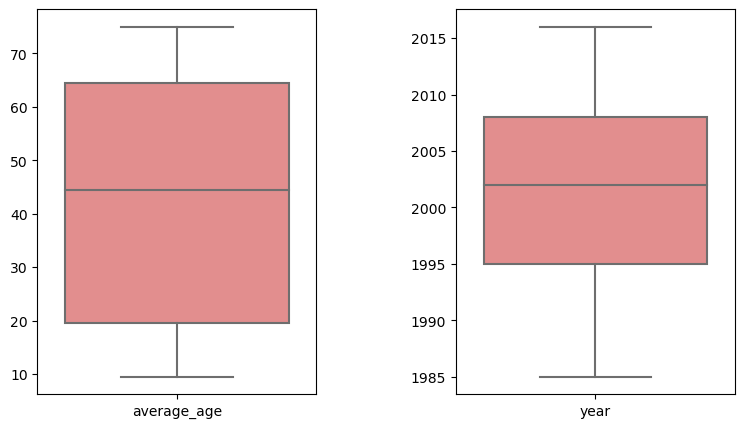

In [9]:
columns_of_interest = ["average_age", 'year']
selected_data = suicide[columns_of_interest]

fig, axes = plt.subplots(ncols=2, figsize=(9, 5))

sns.boxplot(data=selected_data[['average_age']], ax=axes[0], color='lightcoral')
sns.boxplot(data=selected_data[['year']], ax=axes[1], color='lightcoral')

plt.subplots_adjust(wspace=0.5)

plt.show()


Using Boxplot, we will check that these variables are within a reasonable range

# We would like to check if there is a relationship between columns that logically seem related to each other, therefore we will perform a correlation


In [10]:
features= [ 'suicides/100k pop', 'gdp_per_capita ' , 'year', 'average_age','HDI for year' ]

In [11]:
correlation_matrix = suicide[features].corr().round(2)
correlation_matrix

suicides/100k pop  gdp_per_capita   year  average_age  \
suicides/100k pop               1.00             0.00 -0.04         0.35   
gdp_per_capita                  0.00             1.00  0.34         0.00   
year                           -0.04             0.34  1.00         0.00   
average_age                     0.35             0.00  0.00         1.00   
HDI for year                   -0.02             0.22  0.34        -0.00   

                   HDI for year  
suicides/100k pop         -0.02  
gdp_per_capita             0.22  
year                       0.34  
average_age               -0.00  
HDI for year               1.00

<AxesSubplot:>

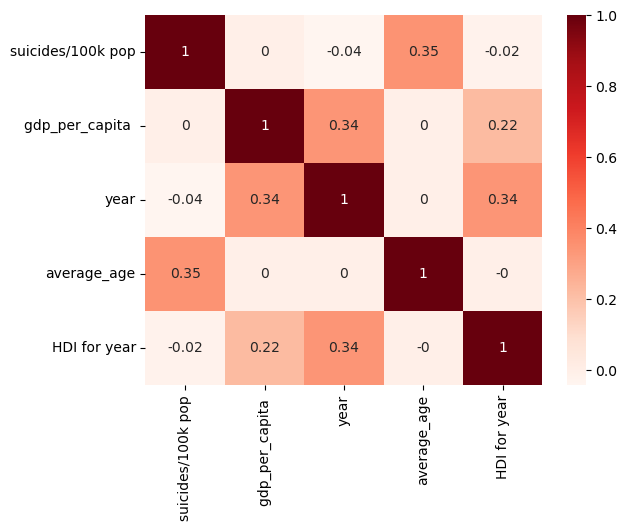

In [12]:
sns.heatmap(data=correlation_matrix,cmap='Reds', annot=True)

It can be seen that there is a weak relationship between the columns (amount of suicides per 100 people, GDP - gross domestic product, year, average age, human development index) and therefore we decided to look at the data from a different angle.

In [13]:
suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [14]:
import pandas as pd

iso_alpha_codes = {
    'Albania': 'ALB', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ABW',
    'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahamas': 'BHS', 'Bahrain': 'BHR',
    'Barbados': 'BRB', 'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ',
    'Bosnia and Herzegovina': 'BIH', 'Brazil': 'BRA', 'Bulgaria': 'BGR', 'Cabo Verde': 'CPV',
    'Canada': 'CAN', 'Chile': 'CHL', 'Colombia': 'COL', 'Costa Rica': 'CRI', 'Croatia': 'HRV', 'Cuba': 'CUB',
    'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Denmark': 'DNK', 'Dominica': 'DMA', 'Ecuador': 'ECU',
    'El Salvador': 'SLV', 'Estonia': 'EST', 'Fiji': 'FJI', 'Finland': 'FIN', 'France': 'FRA', 'Georgia': 'GEO',
    'Germany': 'DEU', 'Greece': 'GRC', 'Grenada': 'GRD', 'Guatemala': 'GTM', 'Guyana': 'GUY', 'Hungary': 'HUN',
    'Iceland': 'ISL', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA', 'Jamaica': 'JAM', 'Japan': 'JPN',
    'Kazakhstan': 'KAZ', 'Kiribati': 'KIR', 'Kuwait': 'KWT', 'Kyrgyzstan': 'KGZ', 'Latvia': 'LVA',
    'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Macau': 'MAC', 'Maldives': 'MDV', 'Malta': 'MLT',
    'Mauritius': 'MUS', 'Mexico': 'MEX', 'Mongolia': 'MNG', 'Montenegro': 'MNE', 'Netherlands': 'NLD',
    'New Zealand': 'NZL', 'Nicaragua': 'NIC', 'Norway': 'NOR', 'Oman': 'OMN', 'Panama': 'PAN', 'Paraguay': 'PRY',
    'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT', 'Puerto Rico': 'PRI', 'Qatar': 'QAT',
    'Republic of Korea': 'KOR', 'Romania': 'ROU', 'Russian Federation': 'RUS',
    'Saint Kitts and Nevis': 'KNA', 'Saint Lucia': 'LCA',
    'Saint Vincent and Grenadines': 'VCT', 'San Marino': 'SMR', 'Serbia': 'SRB',
    'Seychelles': 'SYC', 'Singapore': 'SGP', 'Slovakia': 'SVK', 'Slovenia': 'SVN', 'South Africa': 'ZAF',
    'Spain': 'ESP', 'Sri Lanka': 'LKA', 'Suriname': 'SUR', 'Sweden': 'SWE', 'Switzerland': 'CHE',
    'Thailand': 'THA', 'Trinidad and Tobago': 'TTO', 'Turkey': 'TUR', 'Turkmenistan': 'TKM',
    'Ukraine': 'UKR', 'United Arab Emirates': 'ARE', 'United Kingdom': 'GBR',
    'United States': 'USA', 'Uruguay': 'URY', 'Uzbekistan': 'UZB'
}

# Add a new column 'iso_alpha' with ISO alpha-3 codes 
suicide['iso_alpha'] = suicide['country'].map(iso_alpha_codes)

# Save the DataFrame back to your file
suicide.to_csv(url, index=False)


In [15]:
suicide['suicides_no'] = pd.to_numeric(suicide['suicides_no'])
group_country = suicide.groupby(['year', 'country','iso_alpha'])[['suicides_no']].sum().reset_index()
group_country.head()

year              country iso_alpha  suicides_no
0  1985  Antigua and Barbuda       ATG            0
1  1985            Argentina       ARG         1988
2  1985            Australia       AUS         1861
3  1985              Austria       AUT         2091
4  1985              Bahamas       BHS            1

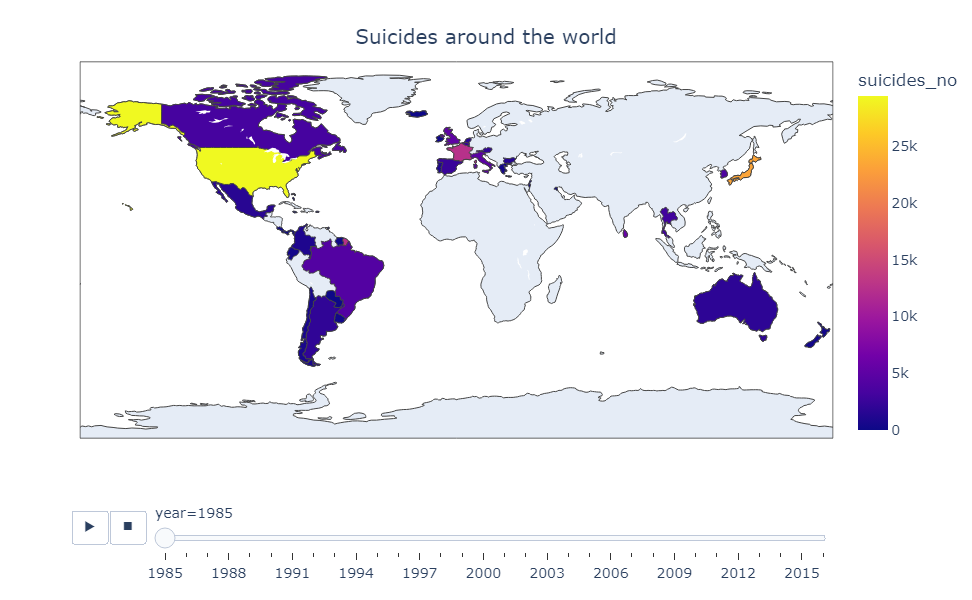

In [16]:
fig = px.choropleth(group_country, 
                    color="suicides_no", 
                    locations="iso_alpha", 
                    hover_name="country", 
                    animation_frame="year",
                    height=600)
fig.update_layout(font = dict(size = 14), title={'text': "Suicides around the world",'y':0.95,'x':0.5},)
fig.show()

---
<a id='1'></a>

### <b id="section_2">  </b> <b style='color:#800080'>CONCLUSIONS  </b> <b></b> 
---


---
<a id='1'></a>

#### <b id="section_2">  </b> <b style='color:#800080'> Conclusion 1  </b> <b></b> 
---


In [17]:
total_sex= suicide.groupby('sex')[['suicides_no']].sum()
total_sex

suicides_no
sex                
female      1559510
male        5188910

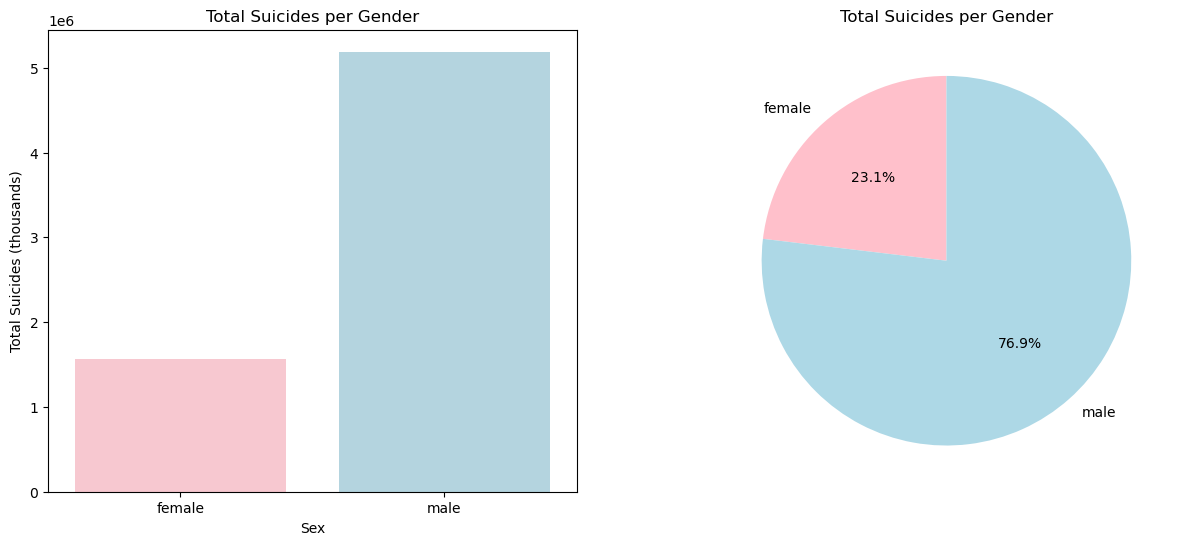

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x=['female', 'male'], y='suicides_no', data=total_sex, palette=["pink", "lightblue"], ax=axes[0])

axes[0].set_title('Total Suicides per Gender')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Total Suicides (thousands)')

axes[1].pie(total_sex['suicides_no'], labels=['female', 'male'], autopct='%1.1f%%', colors=["pink", "lightblue"], startangle=90)

axes[1].set_title('Total Suicides per Gender')

plt.show()


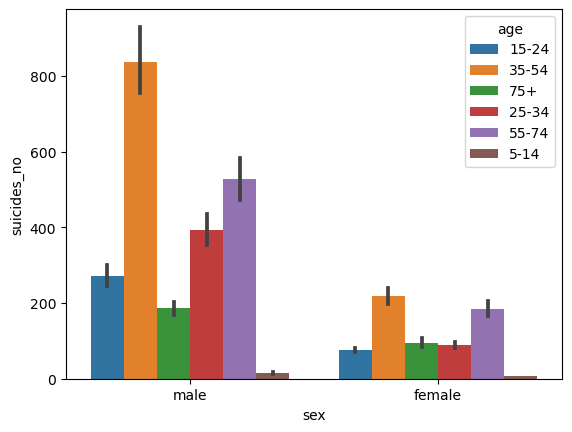

In [19]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=suicide)

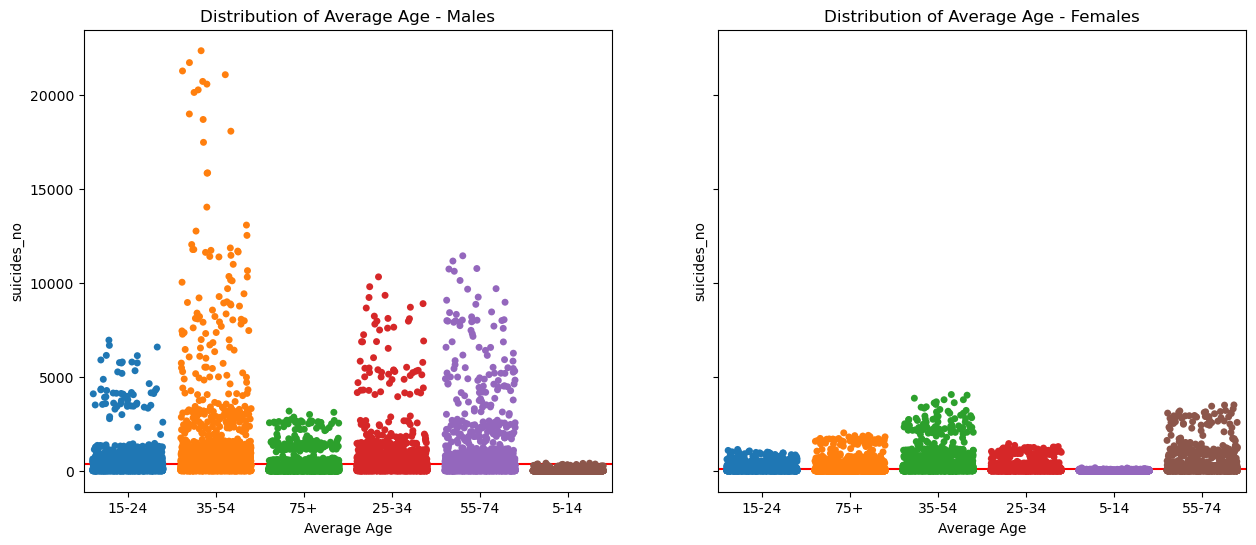

In [20]:
male_data = suicide[suicide['sex'] == 'male']
female_data = suicide[suicide['sex'] == 'female']

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.stripplot(x="age", y="suicides_no", data=male_data, jitter=0.4, ax=axes[0])
axes[0].axhline(y=male_data['suicides_no'].mean(), color='r', label='Mean Age')
axes[0].set_title('Distribution of Average Age - Males')
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('suicides_no')


sns.stripplot(x="age", y="suicides_no", data=female_data, jitter=0.4, ax=axes[1])
axes[1].axhline(y=female_data['suicides_no'].mean(), color='r', label='Mean Age')
axes[1].set_title('Distribution of Average Age - Females')
axes[1].set_xlabel('Average Age')
axes[1].set_ylabel('suicides_no')


plt.show()


We investigated the reasons why men commit suicide much more than women and found that the main reason for this is that men tend to choose more violent ways in their suicide attempts, and therefore most attempts succeed and become fatal.
The most common suicide methods among men are hanging, suffocation through gas inhalation and using weapons.
Women, on the other hand, choose self-poisoning. A large part of them actually chooses non-lethal means, such as excessive use of non-lethal drugs whose damage is reversible.

It can be seen that for both women and men, most suicides occur in the 35-54 age range.
After examining the fact, we discovered that in this age range, they feel that the beautiful years are getting a little farther away, the peak of the growth process is nearing its end, and further down the road, one will no longer be "young".
Sometimes, these years include difficulties that do not make the difficult period easier, such as the loss of parents, divorce, the children leaving home, and the appearance of signs of old age.


---
<a id='1'></a>

#### <b id="section_2">  </b> <b style='color:#800080'> Conclusion 2   </b> <b></b> 
---


In [21]:
top_5_countries = suicide.groupby(['country'])['suicides/100k pop'].sum().nlargest(5)

top_5_countries

country
Russian Federation    11305.13
Lithuania             10588.88
Hungary               10156.07
Kazakhstan             9519.52
Republic of Korea      9350.45
Name: suicides/100k pop, dtype: float64

In [22]:
data = {
    'top_5_country': ['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan', 'Republic of Korea'],
    'value': [11305.13, 10588.88, 10156.07, 9519.52, 9350.45]
}

df = pd.DataFrame(data)

iso_alpha = {
    'Russian Federation': 'RUS',
    'Lithuania': 'LTU',
    'Hungary': 'HUN',
    'Kazakhstan': 'KAZ',
    'Republic of Korea': 'KOR',
 
}

df['iso_alpha'] = df['top_5_country'].map(iso_alpha)


df['value'] = pd.to_numeric(df['value'])
group_5_country = df.groupby(['top_5_country', 'iso_alpha'])[['value']].sum().reset_index()
group_5_country.head()
df

top_5_country     value iso_alpha
0  Russian Federation  11305.13       RUS
1           Lithuania  10588.88       LTU
2             Hungary  10156.07       HUN
3          Kazakhstan   9519.52       KAZ
4   Republic of Korea   9350.45       KOR

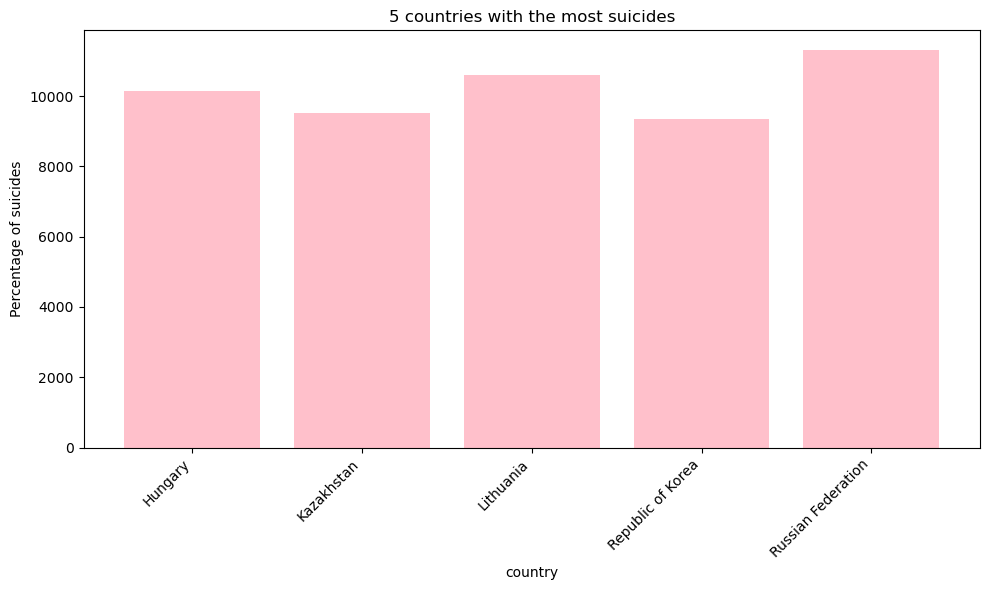

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(group_5_country['top_5_country'], group_5_country['value'], color="pink")

plt.title('5 countries with the most suicides')

plt.xlabel('country')
plt.ylabel('Percentage of suicides')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


####   We will check if there is something in common in certain years that causes these countries to have the highest percentage of suicides


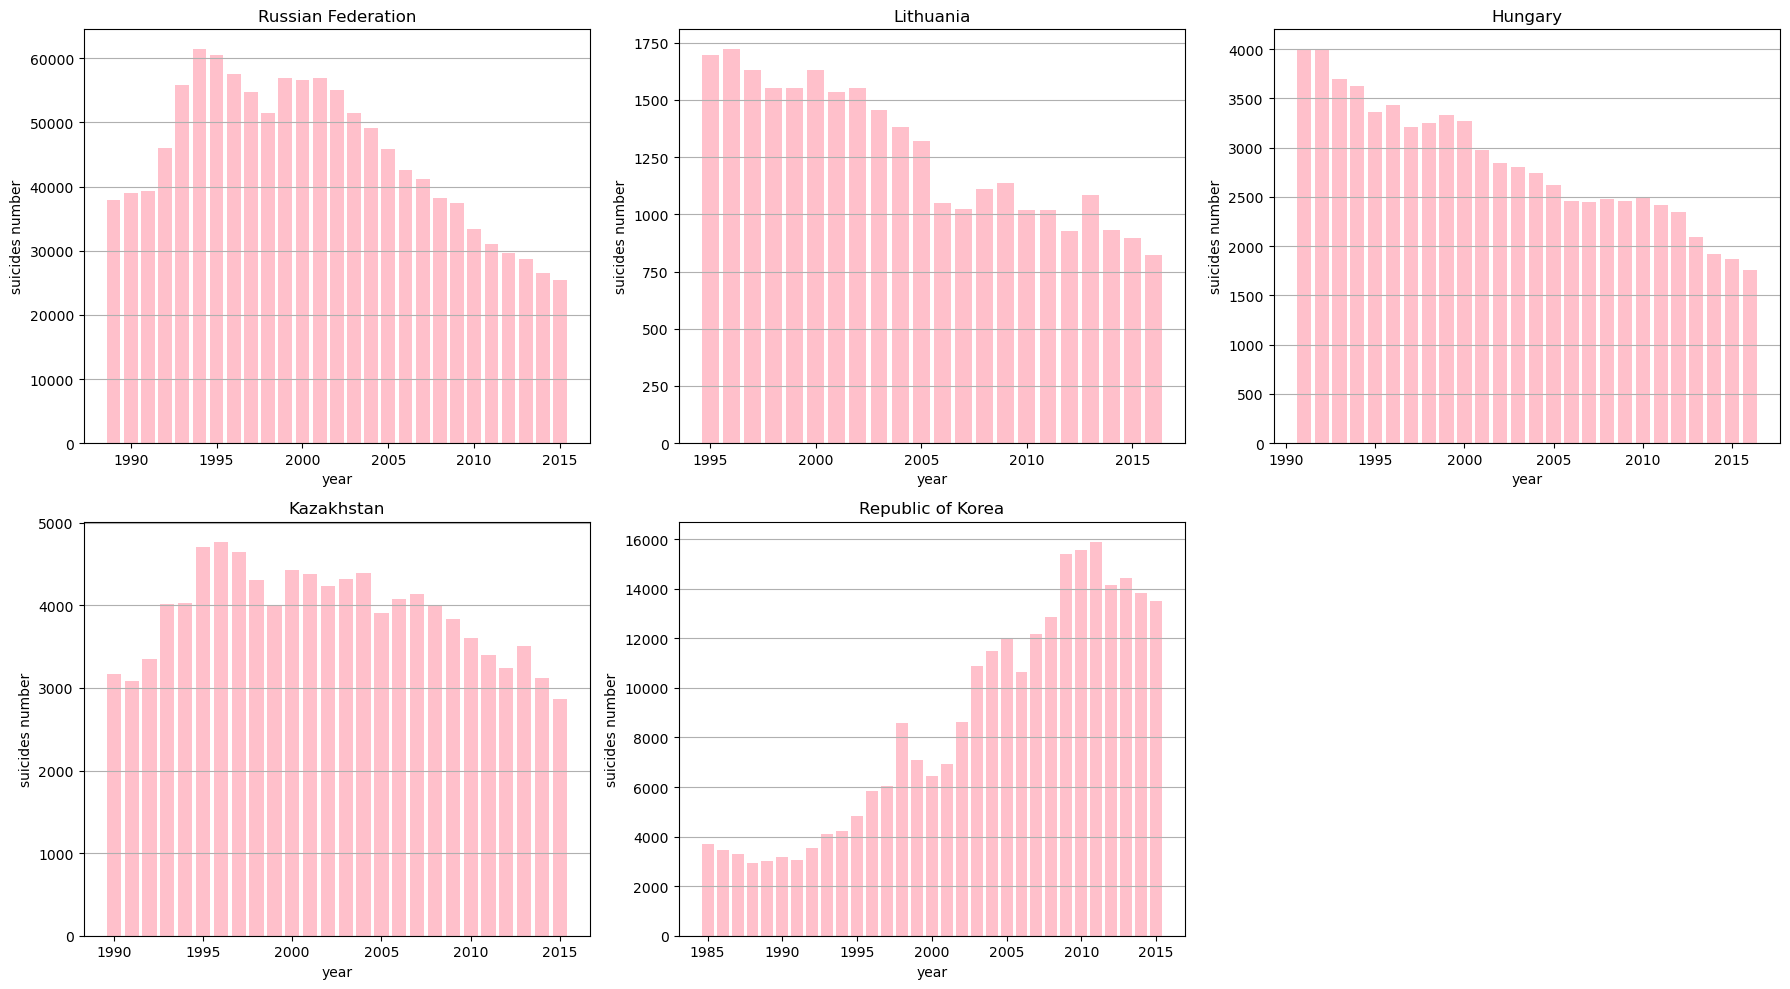

In [24]:
russia_data = suicide[suicide['country'] == 'Russian Federation']
lithuania_data = suicide[suicide['country'] == 'Lithuania']
hungary_data = suicide[suicide['country'] == 'Hungary']
kazakhstan_data = suicide[suicide['country'] == 'Kazakhstan']
korea_data = suicide[suicide['country'] == 'Republic of Korea']

russia_by_year = russia_data.groupby('year')['suicides_no'].sum()
lithuania_by_year = lithuania_data.groupby('year')['suicides_no'].sum()
hungary_by_year = hungary_data.groupby('year')['suicides_no'].sum()
kazakhstan_by_year = kazakhstan_data.groupby('year')['suicides_no'].sum()
korea_by_year = korea_data.groupby('year')['suicides_no'].sum()

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(russia_by_year.index, russia_by_year, color='pink')
plt.title('Russian Federation')
plt.xlabel('year')
plt.ylabel('suicides number')
plt.grid(axis='y')

plt.subplot(2, 3, 2)
plt.bar(lithuania_by_year.index, lithuania_by_year, color='pink')
plt.title('Lithuania')
plt.xlabel('year')
plt.ylabel('suicides number')
plt.grid(axis='y')

plt.subplot(2, 3, 3)
plt.bar(hungary_by_year.index, hungary_by_year, color='pink')
plt.title('Hungary')
plt.xlabel('year')
plt.ylabel('suicides number')
plt.grid(axis='y')

plt.subplot(2, 3, 4)
plt.bar(kazakhstan_by_year.index, kazakhstan_by_year, color='pink')
plt.title('Kazakhstan')
plt.xlabel('year')
plt.ylabel('suicides number')
plt.grid(axis='y')

plt.subplot(2, 3, 5)
plt.bar(korea_by_year.index, korea_by_year, color='pink')
plt.title('Republic of Korea')
plt.xlabel('year')
plt.ylabel('suicides number')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


According to the following graphs, we see that except for Korea, the graphs quite overlap each other.
We researched and saw that nothing drastic happened that is common to all countries over the years such as wars, diseases..
Therefore it can be seen that this is not the reason for the high percentage of suicides in these countries.
Let's look at the issue from another angle:

#### We will check whether the countries have a common climate zone

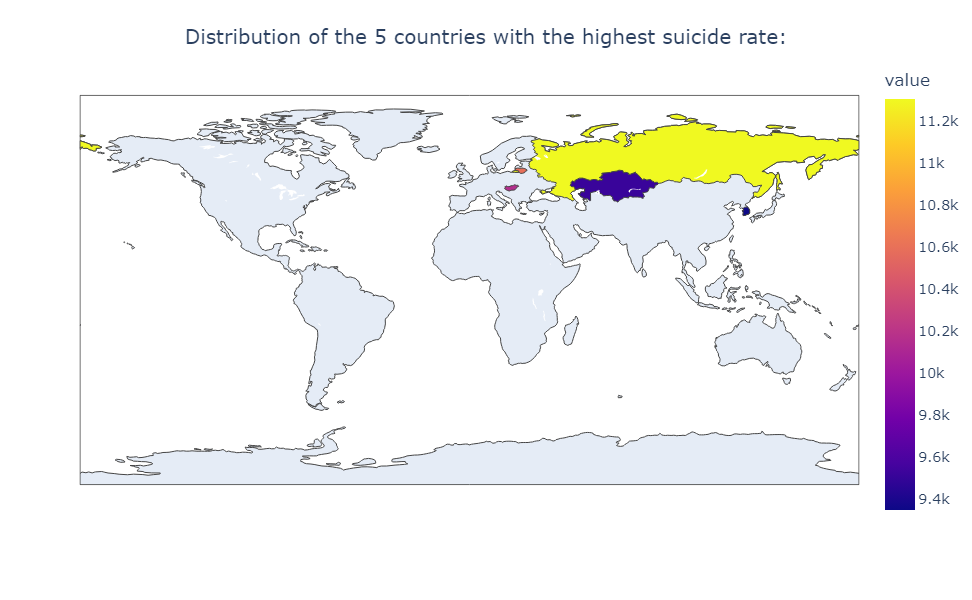

In [25]:
fig = px.choropleth(group_5_country, 
                    color="value", 
                    locations="iso_alpha", 
                    hover_name="top_5_country", 
                    height=600)

fig.update_layout(font=dict(size=14),
    title="Distribution of the 5 countries with the highest suicide rate:",
    title_y=0.95,
    title_x=0.5)

fig.show()


<div> 
<img src = "https://github.com/levyshir7/suicides-rate/blob/main/%D7%9E%D7%A4%D7%AA%20%D7%90%D7%A7%D7%9C%D7%99%D7%9D.gif?raw=true" width="500px" >
</div>

We saw from the map that what the five countries have in common is that all five countries are located in an area where the climate is cold or frozen.
Studies have shown that the majority of the population experiences a certain drop in mood and activity level in the winter, and will experience distress and impaired functioning to the point of winter depression, which leads to a high percentage of suicides.

---
<a id='1'></a>

#### <b id="section_2">  </b> <b style='color:#800080'> Conclusion 3  </b> <b></b> 
---


We would like to check and see if there is a connection between the generation you were born into and the percentage of suicides per 100,000 people

In [26]:
total_generation= suicide.groupby('generation')[['suicides/100k pop']].sum()
total_generation

suicides/100k pop
generation                        
Boomers                   73563.05
G.I. Generation           65708.86
Generation X              67648.45
Generation Z                944.18
Millenials                31461.74
Silent                   117217.55

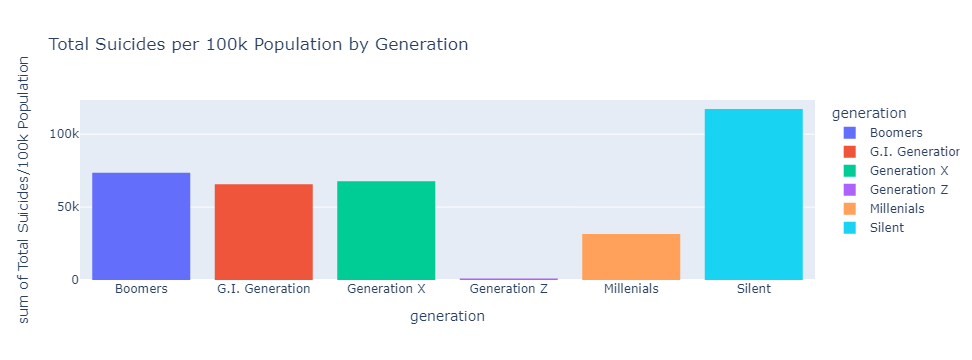

In [27]:
total_generation = suicide.groupby('generation')[['suicides/100k pop']].sum().reset_index()

fig = px.histogram(total_generation, 
                   x='generation', 
                   y='suicides/100k pop', 
                   title='Total Suicides per 100k Population by Generation',
                   labels={'suicides/100k pop': 'Total Suicides/100k Population'},
                   color='generation')

fig.show()


The data above shows the number of suicides committed by people of different generations. Here, we can see that the suicide numbers are higher in the silent generation, which from an examination we found out that this generation experienced the severe economic crisis of the 1930s, and World War II, which caused the percentage of suicides to be so high.
The generation with the smallest number of suicides is Generation Z, the younger and more modern generation some call it the "Plasma Generation" everything comes more easily to them than other generations which makes for a more comfortable and easier life and therefore the percentage of suicides has decreased accordingly.

---
<a id='1'></a>

#### <b id="section_2">  </b> <b style='color:#800080'> Conclusion 4   </b> <b></b> 
---

We wanted to take a micro look at our small and humble country and see the data in it

In [28]:
israel_suicide = suicide[suicide['country'] == 'Israel']

israel_suicide_yearly = israel_suicide.groupby('year')[['suicides_no']].sum()

israel_suicide_yearly.head()


suicides_no
year             
1985          234
1986          278
1987          271
1988          303
1989          353

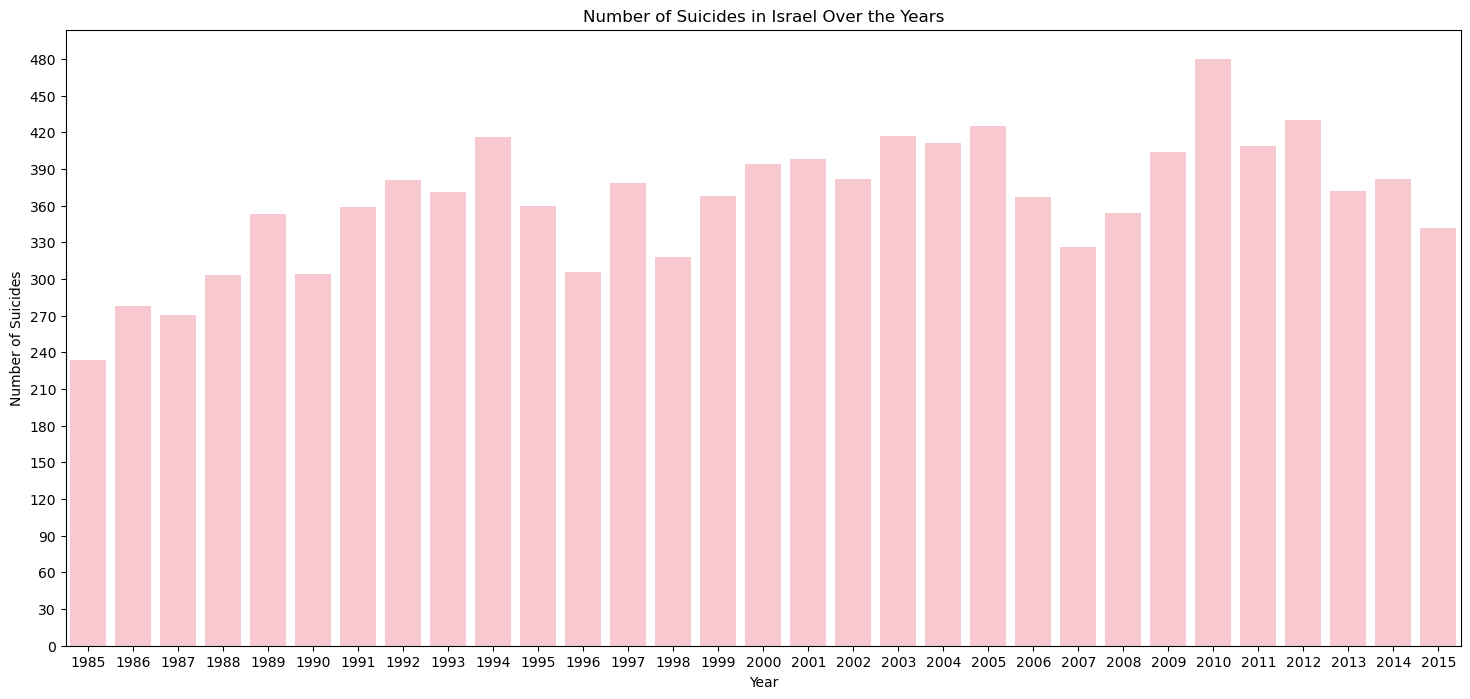

In [29]:
plt.figure(figsize=(18, 8))
sns.barplot(data=israel_suicide_yearly, x=israel_suicide_yearly.index, y='suicides_no', color='pink')

plt.title('Number of Suicides in Israel Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

plt.yticks(range(0, israel_suicide_yearly['suicides_no'].max() + 1, 30))

plt.show()

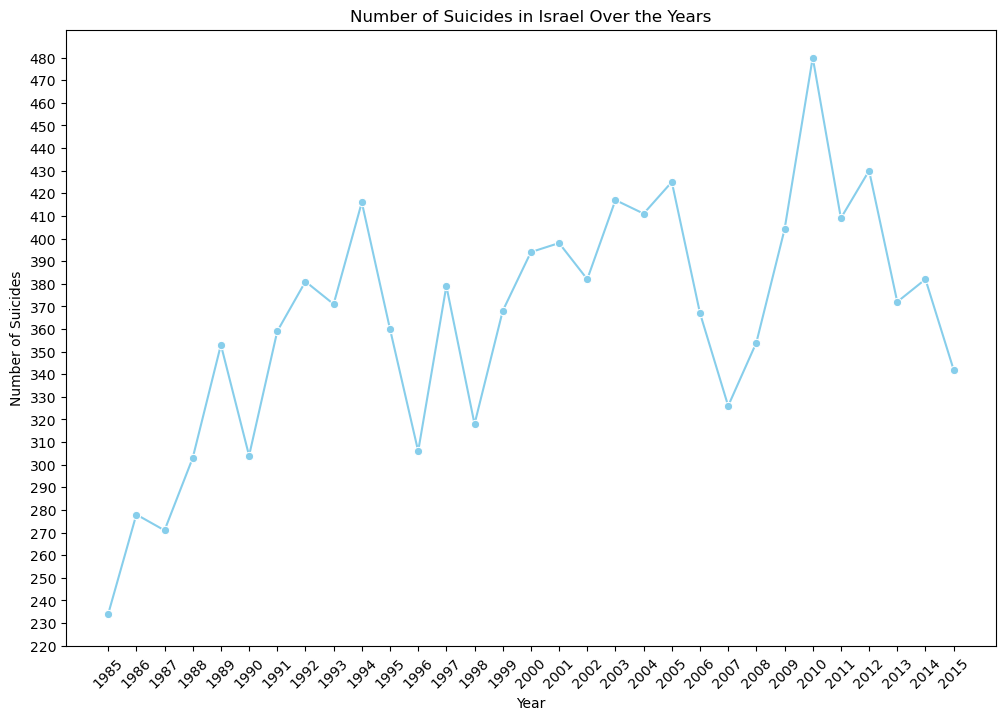

In [30]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=israel_suicide_yearly, x=israel_suicide_yearly.index, y='suicides_no', marker='o', color='skyblue')

plt.title('Number of Suicides in Israel Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

plt.xticks(israel_suicide_yearly.index, rotation=45)
plt.yticks(range(220, israel_suicide_yearly['suicides_no'].max() + 1, 10))


plt.show()


Our conclusion is that the main influence in Israel on the percentage of suicides there is mainly a security issue in the country, periods of battles and threats can create a feeling of mental pressure on the population of Israel.
This leads to psychological effects - periods of fights or threats may create collective thinking in society, harm a sense of security, and arouse feelings of fear and stress in society.
In addition, even after the ceasefires, there is an inability to deal with mental stress personally and socially.